In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
np.random.seed(42)
n = 10
n_test = 100
noise = 0.02

X = np.linspace(0, 1, n)[:, np.newaxis]
Y = np.sin(2 * np.pi * X) + noise * np.random.normal(size=n)[:, np.newaxis]

X_test = np.linspace(0, 1, n_test)[:, np.newaxis]
Y_true = np.sin(2 * np.pi * X_test)

In [69]:
class PolynomialRegression():
    def __init__(self, degree = 1):
        self.degree = degree

        self.w = np.zeros(self.degree)
        self.b = 0

        self._model = lambda x: self.w.dot(x) + self.b

    def __call__(self, x):
        return self._model(self._preprocess(x))

    def train(self, X: np.ndarray, Y: np.ndarray, epoch = 2000, learning_rate = 0.01, lasso = 0, ridge = 0):
        n = len(X)

        costs = []

        sign = lambda x : 1 if x >= 0 else -1

        for _ in range(epoch):
            cost = 0
            
            for index in range(n):
                x, y = self._preprocess(X.item(index)), Y.item(index)

                prediction = self._model(x)

                error = prediction - y

                loss = (error ** 2) / 2

                cost += loss

                l1_update = lasso * np.array(list(map(sign, self.w)))

                l2_update = (2 * ridge) * self.w

                regularization_term = l1_update + l2_update

                update_term = ((error * x) + regularization_term)

                self.w -= learning_rate * update_term

                self.b -= learning_rate * error

            costs.append(cost)

        return costs

    def _preprocess(self, x):
        return np.array([x ** i for i in range(1, self.degree + 1)])

In [70]:
poly = PolynomialRegression(9)
poly_costs = poly.train(X, Y, 4000, 0.2)

In [71]:
ridge_poly = PolynomialRegression(9)
ridge_poly_costs = ridge_poly.train(X, Y, 4000, 0.06, ridge=0.001)

In [72]:
lasso_poly = PolynomialRegression(9)
lasso_poly_costs = lasso_poly.train(X, Y, 4000, 0.06, lasso=0.001)

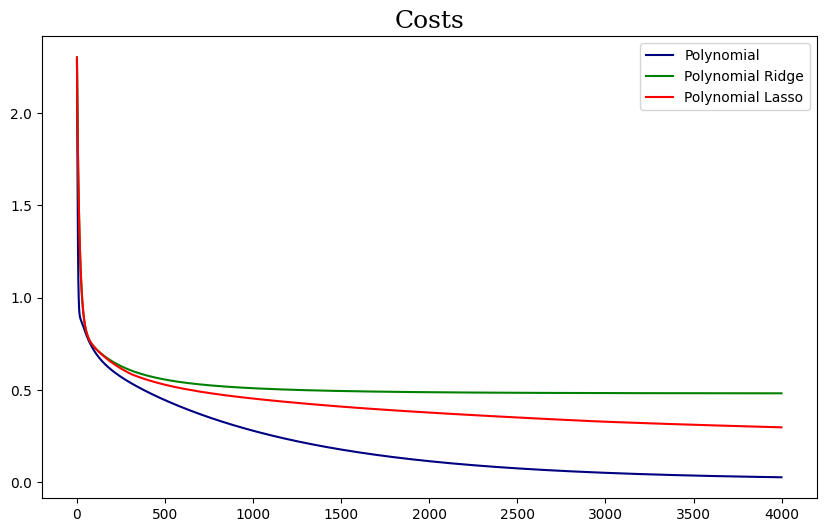

In [189]:
plt.figure(figsize=(10, 6))

plt.plot(poly_costs, color="navy", label="Polynomial")
plt.plot(ridge_poly_costs, color="green", label="Polynomial Ridge")
plt.plot(lasso_poly_costs, color="red", label="Polynomial Lasso")

plt.title("Costs", size=18, family="serif")
plt.legend(loc="upper right")

plt.show()

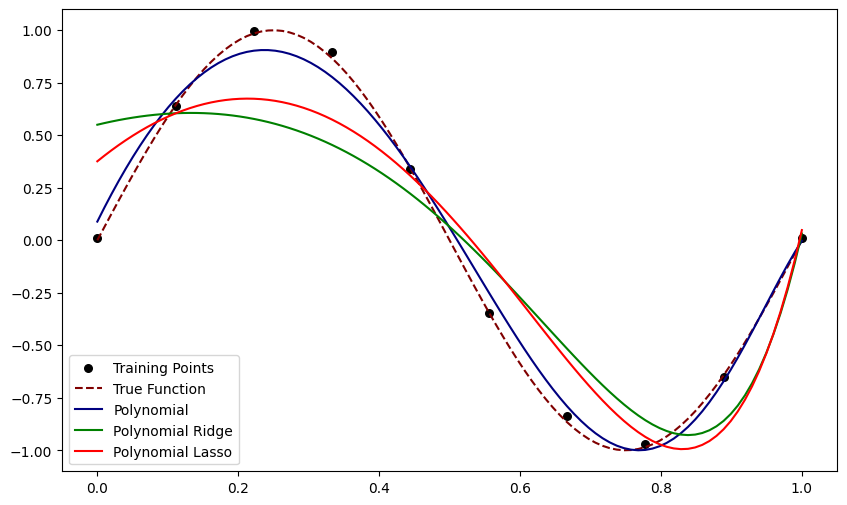

In [183]:
poly_pred = np.array(list(map(poly, X_test)))
poly_ridge_pred = np.array(list(map(ridge_poly, X_test)))
poly_lasso_pred = np.array(list(map(lasso_poly, X_test)))


plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color="black", s=30, marker="o", label="Training Points")

plt.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")

plt.plot(X_test, poly_pred, color="navy", label="Polynomial")

plt.plot(X_test, poly_ridge_pred, color="green", label="Polynomial Ridge")

plt.plot(X_test, poly_lasso_pred, color="red", label="Polynomial Lasso")

plt.legend(loc="lower left")
plt.show()

In [94]:
class BayesianRegression():
    def __init__(self, degree, noise, alpha = 0.05):
        self.degree = degree
        self.noise = noise
        self.alpha = alpha
        self.beta = (1 / noise) ** 2
        self.m_N = None

    def __call__(self, X: np.ndarray):
        return self._create_design_matrix(X) @ self.m_N

    def train(self, X: np.ndarray, Y: np.ndarray, ridge = 0):
        phi = self._create_design_matrix(X)

        S_N_inv = self.alpha * np.eye(self.degree + 1) + self.beta * phi.T @ phi + ridge * np.eye(self.degree + 1)

        S_N = np.linalg.inv(S_N_inv)

        self.m_N = self.beta * S_N @ phi.T @ Y

    def _create_design_matrix(self, X):
        return np.power(X, np.arange(self.degree + 1))

In [95]:
bayesian = BayesianRegression(degree=9, noise=0.02)
bayesian.train(X, Y)

In [113]:
bayesian_ridge = BayesianRegression(degree=9, noise=0.02)
bayesian_ridge.train(X, Y, ridge=1)

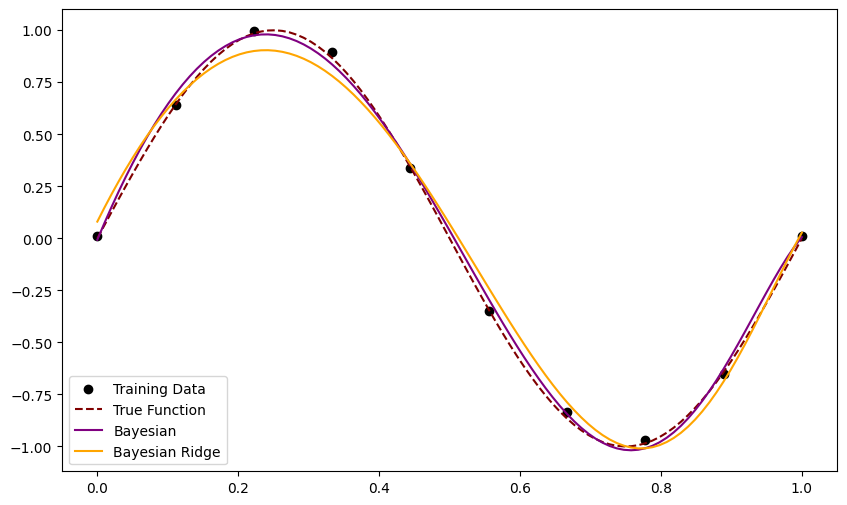

In [184]:
bayesian_pred = bayesian(X_test)
bayesian_ridge_pred = bayesian_ridge(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color="black", label="Training Data")

plt.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")

plt.plot(X_test, bayesian_pred, color="purple", label="Bayesian")

plt.plot(X_test, bayesian_ridge_pred, color="orange", label="Bayesian Ridge")

plt.legend(loc = "lower left")
plt.show()

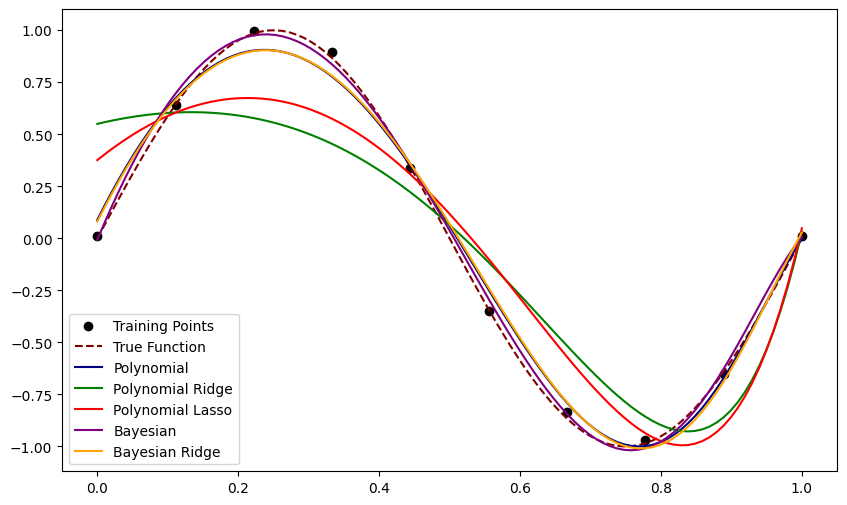

In [185]:
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color="black", label="Training Points")

plt.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")

plt.plot(X_test, poly_pred, color="navy", label="Polynomial")

plt.plot(X_test, poly_ridge_pred, color="green", label="Polynomial Ridge")

plt.plot(X_test, poly_lasso_pred, color="red", label="Polynomial Lasso")

plt.plot(X_test, bayesian_pred, color="purple", label="Bayesian")

plt.plot(X_test, bayesian_ridge_pred, color="orange", label="Bayesian Ridge")

plt.legend(loc = "lower left")
plt.show()

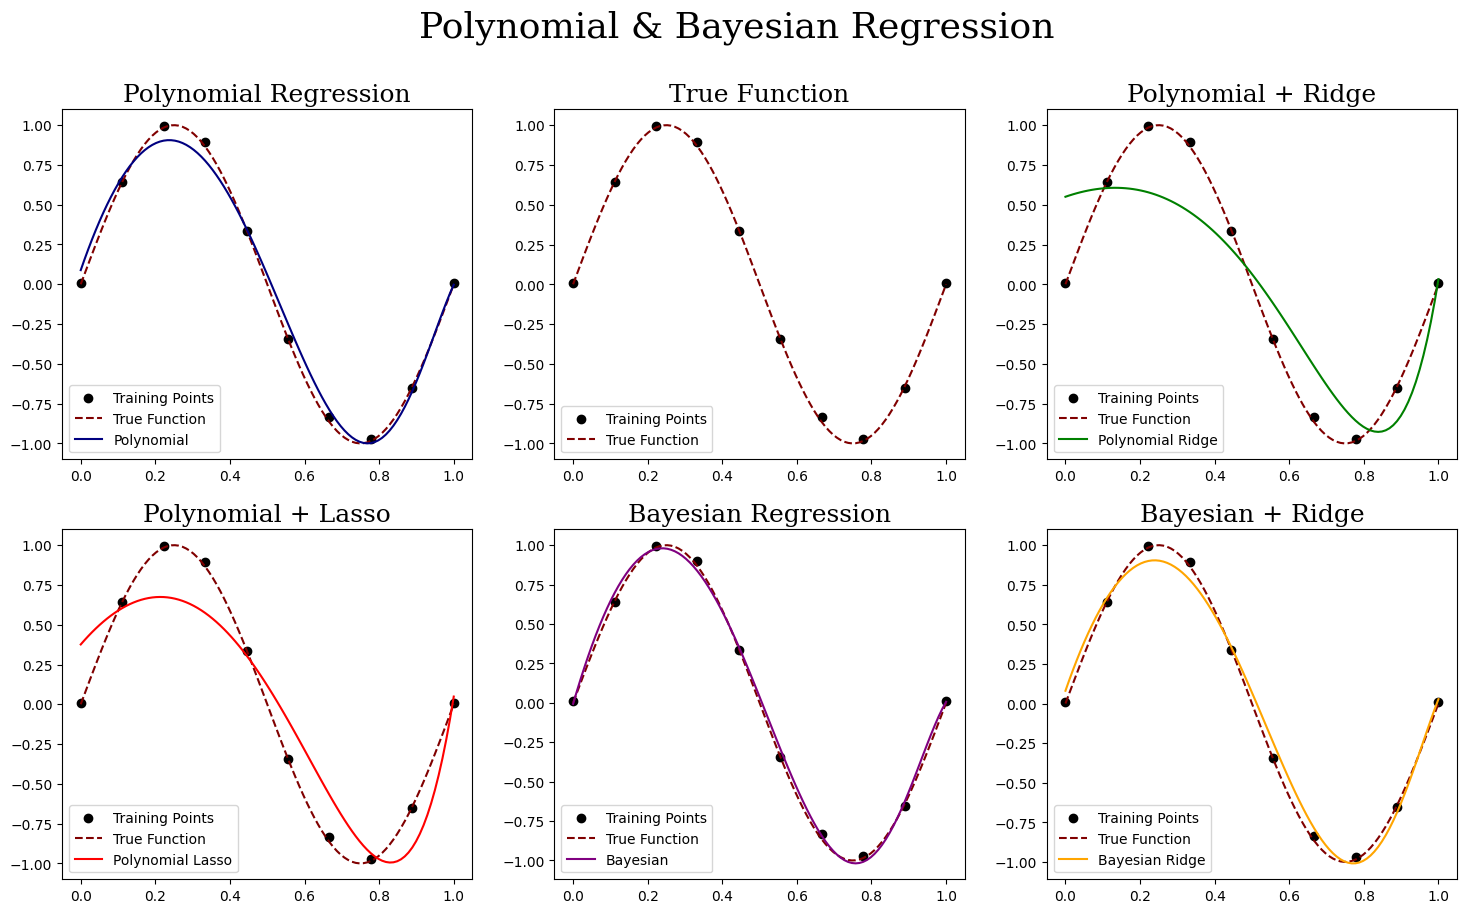

In [187]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs = axs.flatten()

for ax in axs:
    ax.scatter(X, Y, color='black', label="Training Points")
    ax.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")


axs[0].plot(X_test, poly_pred, color='navy', label="Polynomial")
axs[0].set_title("Polynomial Regression", size=18, family="serif")
axs[0].legend(loc = "lower left")

axs[1].set_title("True Function", size=18, family="serif")
axs[1].legend(loc = "lower left")

axs[2].plot(X_test, poly_ridge_pred, color='green', label="Polynomial Ridge")
axs[2].set_title("Polynomial + Ridge", size=18, family="serif")
axs[2].legend(loc = "lower left")

axs[3].plot(X_test, poly_lasso_pred, color='red', label="Polynomial Lasso")
axs[3].set_title("Polynomial + Lasso", size=18, family="serif")
axs[3].legend(loc = "lower left")

axs[4].plot(X_test, bayesian_pred, color='purple', label="Bayesian")
axs[4].set_title("Bayesian Regression", size=18, family="serif")
axs[4].legend(loc = "lower left")

axs[5].plot(X_test, bayesian_ridge_pred, color='orange', label="Bayesian Ridge")
axs[5].set_title("Bayesian + Ridge", size=18, family="serif")
axs[5].legend(loc = "lower left")

fig.suptitle('Polynomial & Bayesian Regression', size=26, family="serif")

plt.show()